In [2]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.datasets

import sklearn

In [3]:
# Functions
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv

# Tools
from sklearn.model_selection import HalvingRandomSearchCV

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
X_final_train_images, X_final_test_images, y_final_train, y_final_test = train_test_split(train_images, train_labels, test_size=0.3, random_state=42)

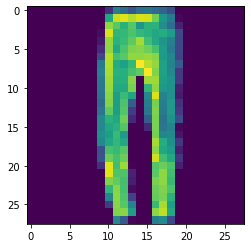

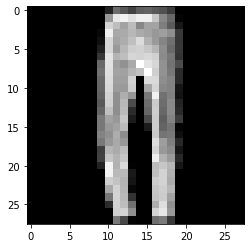

1


In [6]:
# origin
plt.imshow(X_final_train_images[0])
plt.show()

# grayscale 
plt.imshow(X_final_train_images[0], cmap='gray')
plt.show()

print(y_final_train[0])

def print_sample(img):
    plt.imshow(img, cmap='gray')
    plt.show()

In [7]:
X_train_images, X_test_images, y_train, y_test = train_test_split(X_final_train_images, y_final_train, test_size=0.3, random_state=11)

In [8]:
X_train = X_train_images.reshape(X_train_images.shape[0], 784)
X_test = X_test_images.reshape(X_test_images.shape[0], 784)

In [ ]:
# Try first random forast
rfc = RandomForestClassifier(random_state=11)

rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)

NameError: name 'rfc' is not defined